![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM5-INUM - Commande
# TP 4

# [Hexapawn](https://en.wikipedia.org/wiki/Hexapawn)
See: Gardner, M. *The unexpected hanging and other mathematical diversions.* Chicago Press, 1991.

![image.png](https://upload.wikimedia.org/wikipedia/commons/a/a1/Hexapawn.png)

![image.png](hexapawn.png)

## Reinforcement

In [14]:
function b = member(x, l)
% member -- Membership test
%
%  Usage
%    b = member(x, l)
%
%  Inputs
%    x      numerical value
%    l      list
%
%  Outputs
%    b      boolean
%
%  Description
%    True if x belongs to l.
%
%  See also
%    cell arrays
%

b = 0;
n = length(l);
i = 1;

while ~b & (i <= n)
  if ( norm(l{i} - x) == 0 )
    b = 1;
  else
    i = i+1;
  end;
end;

end % function

In [15]:
function ll = prune(x, l)
% prune -- Prunes value
%
%  Usage
%    ll = prune(x, l)
%
%  Inputs
%    x      numerical value
%    l      list
%
%  Outputs
%    ll     list
%
%  Description
%    Prunes all occurences of x (if present) from list l
%
%  See also
%    cell arrays
%

ll = { }; 

for i = 1:length(l)
  if (norm(l{i} - x) > 0), ll = { ll{:} l{i} }; end;
end;

end % function

In [16]:
function llu = reinforce(X, u, lX, lu);
% reinforce -- Control reinforcement
%
%  Usage
%    llu = reinforce(X, u, lX, lu)
%
%  Inputs
%    X      3 x 3 matrix, state
%    u      2 x 2 matrix, control
%    lX     list of states
%    lu     list of list of controls (one list pear possible state in lX)
%
%  Outputs
%    llu    list of list of controls (updated)
%
%  Description
%    Finds the list corresponding to state X in lu, and prunes u from it.
%    Error if X is not found in lX, or if u is not found in the list.
%
%  See also
%    prune
%

llu = lu; # UPDATE

end % function

## Dynamics of player1 (white) and player2 (black / AI)

In [17]:
function Y = f1(X, u)
% f1 -- Dynamics of player1
%
%  Usage
%    Y = f1(X, u)
%
%  Inputs
%    X      3 x 3 matrix, state
%    u      2 x 2 matrix, control
%
%  Outputs
%    Y      3 x 3 matrix, new state
%
%  Description
%    Transition from state X when player1 applies control u
%
%  See also
%    f2
%

if X(u(1, 1), u(1, 2)) ~= 1
  error('Wrong move.');
end;

Y = X;
Y(u(1, 1), u(1, 2)) = 0;
Y(u(2, 1), u(2, 2)) = 1;

end % function

In [18]:
function Y = f2(X, u)
% f2 -- Dynamics of player2
%
%  Usage
%    Y = f2(X, u)
%
%  Inputs
%    X      3 x 3 matrix, state
%    u      2 x 2 matrix, control
%
%  Outputs
%    Y      3 x 3 matrix, new state
%
%  Description
%    Transition from state X when player2 applies control u
%
%  See also
%    f1
%

if X(u(1, 1), u(1, 2)) ~= 2
  error('Wrong move.');
end;

Y = X;
Y(u(1, 1), u(1, 2)) = 0;
Y(u(2, 1), u(2, 2)) = 2;

end % function

## Random player1 and player2

In [19]:
function u = play1(X, inter)
% play1 -- Random control generation for player1
%
%  Usage
%    u = play1(X)
%    u = play1(X, inter)
%
%  Inputs
%    X      3 x 3 matrix, state
%    inter  boolean, interactive player1 [ False ]
%
%  Outputs
%    u      control
%
%  Description
%    Generates an admissible random move for player1 from state X. Error if no move is
%    allowed.
%
%  See also
%    play2
%

if (nargin == 1)
  inter = 0;
end;

lu = gen1(X);
n = length(lu);

if (n == 0), error('No possible move.'); end;

if inter
  disp('Player 1 possible moves:')
  for i = 1:n, disp(f1(X,lu{i})); end
  while 1
    i = input('Move ? ');
    if (i >= 1) & (i <= n), break; end;
  end;
  u = lu{i};

else

  u = lu{randi(n, 1)};

end;

end % function

In [20]:
function u = play2(X, lX, lu)
% play2 -- Random control generation for player2
%
%  Usage
%    u = play2(X, lX, lu)
%
%  Inputs
%    X      3 x 3 matrix, state
%    lX     list of states
%    lu     list of list of controls (one list per possible state in lX)
%
%  Outputs
%    u      control
%
%  Description
%    Picks in lu an admissible random move for player2 from state X. Empty [ ] control
%    if no move is allowed.
%
%  See also
%    play1
%

n = length(lX);

i = 1;
found = 0;

while (~found) & (i <= n)
  if (norm(lX{i}-X) == 0)
    found = 1;
    l = lu{i};
  else
    i = i+1;
  end;
end;

if found
  m = length(l);
  if (m == 0)
    u = [ ];
  else
    u = l{randi(m, 1)};
  end;

else
  u = [ ];

end;

end % function

## Win test for player1 and 2

In [21]:
function b = win1(X)
% win1 -- Win test for player1
%
%  Usage
%    b = win1(X)
%
%  Inputs
%    X      3 x 3 matrix, state
%
%  Outputs
%    b      boolean, true if player1 wins
%
%  Description
%    Player1 wins if (i) she reaches i=1, (ii) or she has taken all of player2 pawns,
%    (iii) or player2 cannot play any move.
%
%  See also
%    win2
%

if ~isempty( find(X(1, :) == 1)  ) % case (i)
  b = 1;

elseif isempty( find(X == 2)  )    % case (ii)
  b = 1;

elseif isempty( gen2(X) )          % case (iii)
  b = 1;

else
  b = 0;

end;

end % function

In [22]:
function b = win2(X)
% win2 -- Win test for player2
%
%  Usage
%    b = win2(X)
%
%  Inputs
%    X      3 x 3 matrix, state
%
%  Outputs
%    b      boolean, true if player2 wins
%
%  Description
%    Player2 wins if (i) she reaches i=3, (ii) or she has taken all of player1 pawns,
%    (iii) or player1 cannot play any move.
%
%  See also
%    win1
%

if ~isempty( find(X(3, :) == 2)  ) % case (i)
  b = 1;

elseif isempty( find(X == 1)  )    % case (ii)
  b = 1;

elseif isempty( gen1(X) )          % case (iii)
  b = 1;

else
  b = 0;

end;

end % function

## Generation of admissible controls for player1 and player2

In [23]:
function lu = gen1(X)
% gen1 -- Control generation for player1
%
%  Usage
%    lu = gen1(X)
%
%  Inputs
%    X      3 x 3 matrix, state
% 
%  Outputs
%    lu     list of controls
%
%  Description
%    Generates all possible moves for player1 from state X.
%
%  See also
%    gen2
%

lu = { };

[ i, j ] = find(X == 1);

for k = 1:length(i)

  if (i(k) >= 2) % move
    if (X(i(k)-1, j(k)) == 0)
      u = [ i(k)   j(k)
            i(k)-1 j(k) ];
      lu = { lu{:} u };
    end;
  end;

  if (i(k) >= 2) & (j(k) >=2) % take (1/2)
    if (X(i(k)-1, j(k)-1) == 2)
      u = [ i(k)   j(k)
            i(k)-1 j(k)-1 ];
      lu = { lu{:} u };
    end;
  end;

  if (i(k) >= 2) & (j(k) <=2) % take (2/2)
    if (X(i(k)-1, j(k)+1) == 2)
      u = [ i(k)   j(k)
            i(k)-1 j(k)+1 ];
      lu = { lu{:} u };
    end;
  end;

end;

end % function

In [24]:
function lu = gen2(X)
% gen2 -- Control generation for player2
%
%  Usage
%    lu = gen2(X)
%
%  Inputs
%    X      3 x 3 matrix, state
%
%  Outputs
%    lu     list of controls
%
%  Description
%    Generates all possible moves for player2 from state X.
%
%  See also
%    gen1
%

lu = { };

[ i, j ] = find(X == 2);

for k = 1:length(i)

  if (i(k) <= 2) % move
    if (X(i(k)+1, j(k)) == 0)
      u = [ i(k)   j(k)
            i(k)+1 j(k) ];
      lu = { lu{:} u };
    end;
  end;

  if (i(k) <= 2) & (j(k) >=2) % take (1/2)
    if (X(i(k)+1, j(k)-1) == 1)
      u = [ i(k)   j(k)
            i(k)+1 j(k)-1 ];
      lu = { lu{:} u };
    end;
  end;

  if (i(k) <= 2) & (j(k) <=2) % take (2/2)
    if (X(i(k)+1, j(k)+1) == 1)
      u = [ i(k)   j(k)
            i(k)+1 j(k)+1 ];
      lu = { lu{:} u };
    end;
  end;

end;

end % function

## Game

In [25]:
function [ llu1, llu3, llu5, winner ] = game(lu1, lu3, lu5, inter, dsp)
% game -- Hexapawn game
%
%  Usage
%    [ llu1, llu3, llu5, winner ] = game(lu1, lu3, lu5)
%    [ llu1, llu3, llu5, winner ] = game(lu1, lu3, lu5, inter, dsp)
%
%  Inputs
%    lu1    list, possible controls for u1 depending on X1 
%    lu3    list, possible controls for u3 depending on X3 
%    lu5    list, possible controls for u5 depending on X5 
%    inter  boolean, interactive player1 [ False ]
%    dsp    boolean, display states [ False ]
%
%  Outputs
%    llu1   list, reinforcement of lu1
%    llu3   list, reinforcement of lu3
%    llu5   list, reinforcement of lu5
%    winner integer, 1 or 2
%
%  Description
%    Plays one Hexapawn game and reinforces player2 controls.
%
%  See also
%    reinforce
%

global lX1
global lX3
global lX5

if (nargin == 3)
  inter = 0;
  dsp = 0;
elseif (nargin == 4)
  dsp = 0;
end;

X0 = [ 2 2 2
       0 0 0
       1 1 1 ];
if dsp, disp('Initial game:'); disp(X0); end;

% Move 0: player1
while 1
  u0 = play1(X0, inter);
  if norm(u0 - [ 3 3 ; 2 3 ]) > 0,
    break;
  else
    if inter, disp('No right opening!'); end;
  end;
end;

X1 = f1(X0, u0); % no possible win after u0
if dsp, disp('Player 1 move:'); disp(X1); end;

% Move 1: player2
u1 = play2(X1, lX1, lu1);
X2 = f2(X1, u1); % no possible win after u1
if dsp, disp('Player 2 move:'); disp(X2); end;

% Move 2: player1
u2 = play1(X2, inter);
X3 = f1(X2, u2);
if dsp, disp('Player 1 move:'); disp(X3); end;

if win1(X3) || isempty(play2(X3, lX3, lu3))
  winner = 1;
  lu1 = reinforce(X1, u1, lX1, lu1);

else

% Move 3: player2
u3 = play2(X3, lX3, lu3);
X4 = f2(X3, u3);
if dsp, disp('Player 2 move:'); disp(X4); end;

if win2(X4)
  winner = 2;

else

% Move 4: player1
u4 = play1(X4, inter);
X5 = f1(X4, u4);
if dsp, disp('Player 1 move:'); disp(X5); end;

if win1(X5) || isempty(play2(X5, lX5, lu5))
  winner = 1;
  lu3 = reinforce(X3, u3, lX3, lu3);

else

% Move 5: player2
u5 = play2(X5, lX5, lu5);
X6 = f2(X5, u5);
if dsp, disp('Player 2 move:'); disp(X6); end;

if win2(X6)
  winner = 2;

else
  winner = 1; % useless to play last move
  lu5 = reinforce(X5, u5, lX5, lu5);

end, end, end, end;

llu1 = lu1;
llu3 = lu3;
llu5 = lu5;

end % function

## Iterated game for learning

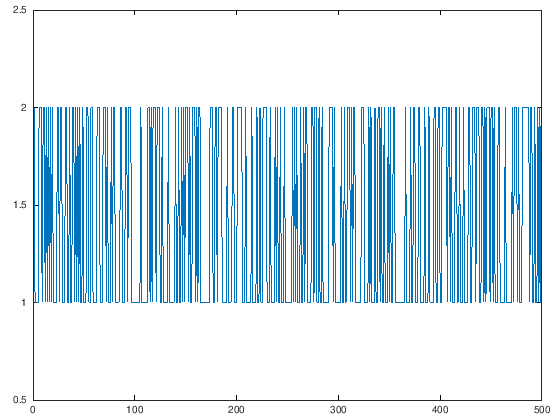

In [26]:
% main

% List of states for X1, X3 and X5

global lX1
global lX3
global lX5

lX1 = { [ 2 2 2
          1 0 0 
        0 1 1 ] ...
                  ...
      [ 2 2 2
        0 1 0 
        1 0 1 ] };

lX3 = { [ 2 0 2
          2 1 0
        0 0 1 ] ...
                ...
      [ 0 2 2
        1 2 0
        0 0 1 ] ...
                ...
      [ 2 0 2
        1 1 0
        0 1 0 ] ...
                ...
        [ 2 2 0
        1 0 1
        0 0 1 ] ...
                ...
      [ 0 2 2
        0 2 1
        1 0 0 ] ...
                ...
      [ 0 2 2
        2 1 1
        1 0 0 ] ...
                ...
      [ 2 0 2
        2 0 1
        0 1 0 ] ...
                ...
      [ 2 2 0
        1 1 2
        0 0 1 ] ...
                ...
      [ 0 2 2
        0 1 0
        0 0 1 ] ...
                ...
      [ 0 2 2
        0 1 0 
        1 0 0 ] ...
                ...
      [ 2 0 2
        1 0 0 
        0 0 1 ] };

llX3 = { };
for i = 1:length(lX3)
  X = lX3{i};
  Y = [ X(:, 3) X(:, 2) X(:, 1) ];
  if (norm(X-Y) ~= 0)
    if ~member(Y, lX3)
      llX3 = { llX3{:} Y };
    end;
  end;
end;
lX3 = { lX3{:} llX3{:} }; % adds missing symmetric configurations

lX5 = { [ 0 0 2
          2 2 1
          0 0 0 ] ...
                  ...
        [ 2 0 0 
          1 1 1
          0 0 0 ] ...
                  ...
      [ 0 2 0
        2 1 1
        0 0 0 ] ...
                ...
      [ 0 2 0 
        1 1 2
        0 0 0 ] ...
                ...
      [ 2 0 0
        2 2 1
        0 0 0 ] ...
                ...
      [ 0 0 2
        1 2 2
        0 0 0 ] ...
                ...
      [ 0 0 2
        2 1 0
        0 0 0 ] ...
                ...
      [ 0 2 0
        1 2 0
        0 0 0 ] ...
                ...
      [ 0 2 0
        0 2 1
        0 0 0 ] ...
                ...
      [ 2 0 0 
        2 1 0
        0 0 0 ] ...
                ...
      [ 0 0 2
        0 1 2
        0 0 0 ] };

llX5 = { };
for i = 1:length(lX5)
  X = lX5{i};
  Y = [ X(:, 3) X(:, 2) X(:, 1) ];
  if (norm(X-Y) ~= 0)
    if ~member(Y, lX5)
      llX5 = { llX5{:} Y };
    end;
  end;
end;
lX5 = { lX5{:} llX5{:} }; % adds missing symmetric configurations

% Lists of all possible controls (moves) for player2 associated from X1, X3 and X5
          
lu1 = { };
for i = 1:length(lX1)
  lu1 = { lu1{:} gen2(lX1{i}) };
end;

lu3 = { };
for i = 1:length(lX3)
  lu3 = { lu3{:} gen2(lX3{i}) };
end;

lu5 = { };
for i = 1:length(lX5)
  lu5 = { lu5{:} gen2(lX5{i}) };
end;

% Plays N games and learns 

N = 500; % number of games
winner = zeros(1, N);
inter = 0; % interactive player1
dsp = 0; % displays states

for i = 1:N

  [ lu1, lu3, lu5, winner(i) ] = game(lu1, lu3, lu5, inter, dsp);
  if dsp, fprintf('Player %d wins\n', winner(i)); end; %input(''); end;
  
end;

plot(winner)
axis([ 0 N 0.5 2.5 ])